# Project

Author: Norbert Antal
<br>

### Project description

This project explores the PlantGrowth dataset using statistical analysis techniques, including t-tests and ANOVA, to identify significant differences between treatment groups. 

### Project brief
*Complete the project in a single notebook called project.ipynb in your repository. The same style should be used as detailed above: explanations in MarkDown and code comments, clean code, and regular commits. Use plots as appropriate.*

*In this project, you will analyze the PlantGrowth R dataset. You will find a short description of it on Vicent Arel-Bundock's Rdatasets page. The dataset contains two main variables, a treatment group and the weight of plants within those groups.*

*The aim is to perform t-tests and ANOVA on this dataset while describing the dataset and explaining your work.* <br>

#### Project tasks:

- Download and save the dataset to your repository.
- Describe the data set in the notebook.
- Describe what a t-test is, how it works, and what the assumptions are.
- Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.
- Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.
- Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.

In [1]:
# import required modules
import pandas as pd # dataframe operations
import matplotlib.pyplot as plt # visualisation
import seaborn as sns # visualisation
from scipy import stats # statistical tests

# 1. Acquire data
Data downloaded and stored in the `\data` folder. 

## 1.1 Introduction of data
The dataset used in this project was provided by the lecturer, with the original source available on Vincent Arel-Bundock's Rdatasets page on GitHub [1].

The `PlantGrowth` dataset comes from an experiment designed to compare plant yields, measured as dried weights, obtained under a control and two different treatment conditions. It includes a control group (`ctrl`) and two treatment groups (`trt1` and `trt2`). The dataset contains 30 observations with two variables:
- **weight:** The dried weight of plants.
- **group:** The experimental group (control or treatment).

This dataset forms the basis for investigating the effects of treatment conditions on plant growth. It was originally sourced in Dobson's *An Introduction to Statistical Modelling* (1983) [2].

# 2. Data Preparation, Cleaning and Analysis

In [2]:
# Read in data to pandas dataframe
df = pd.read_csv("data/plantgrowth.csv")
#df.head()
print(df.dtypes)

rownames      int64
weight      float64
group        object
dtype: object


The original CSV file is read into pandas dataframe. Pandas is a powerful library for working with structured data in Python allowing to manipulate, analyze, and visualize the data.[3]

The created dataframe has three variables.

- `weight` (float64): numerical variable
- `group` (object): Categorical variable

The `rownames` column (int64) serves as a row identifier and can be dropped as it does not hold analytical value.

In [3]:
# drop irrelevant rownames column
df.drop(columns=['rownames'], inplace=True)

## 2.1 Summary Analysis

In [4]:
# Summary statistics
print(df.head()) # review dataframe structure
df.describe() # get summary statistics of numeric data

   weight group
0    4.17  ctrl
1    5.58  ctrl
2    5.18  ctrl
3    6.11  ctrl
4    4.50  ctrl


,weight
count,30.000000
mean,5.073000
std,0.701192
min,3.590000
25%,4.550000
50%,5.155000
75%,5.530000
max,6.310000


The dataframe created from the PlantGrowth dataset contains 30 observations with the following columns:
- `weight`: Dried plant weights with:
  - **Mean:** 5.073, **Std Dev:** 0.701  
  - **Range:** 3.59 to 6.31  
  - **Median:** 5.155, **IQR:** 4.55–5.53
- `group`: Categorical variable for the groupnames

Summary statistics by groups may be relevant.

In [36]:
#Summary statistics by group
df.groupby('group').describe() # ref: https://www.statology.org/pandas-groupby-describe/

weight                                                    
       count   mean       std   min     25%    50%     75%   max
group                                                           
ctrl    10.0  5.032  0.583091  4.17  4.5500  5.155  5.2925  6.11
trt1    10.0  4.661  0.793676  3.59  4.2075  4.550  4.8700  6.03
trt2    10.0  5.526  0.442573  4.92  5.2675  5.435  5.7350  6.31

Each group (`ctrl`, `trt1`, `trt2`) has 10 samples of plant weights;

- **ctrl**: Mean = 5.03, Std = 0.58, Range = 4.17–6.11  
- **trt1**: Mean = 4.66, Std = 0.79, Range = 3.59–6.03  
- **trt2**: Mean = 5.53, Std = 0.44, Range = 4.92–6.31  

There are key differences in mean weights and variability (std) among groups.
<br> Visualising the data may reveal specific characteristics of the groups.

## 2.2 Data Visualisation

To explore the distribution and group-wise differences in the `weight` variable of the *PlantGrowth* dataset, a combination of visualisation techniques was employed using *matplotlib.ppyplot* and *seaborn* visualisations.<br>Matplotlib and Seaborn are both versatile Python libraries used for creating static, interactive, and animated visualizations in a wide range of formats.[4],[5] <br>A grouped histogram highlights the data spread by groups, while a combined box plot and scatter plot provides visual clues regarding differences and individual data points within each group.

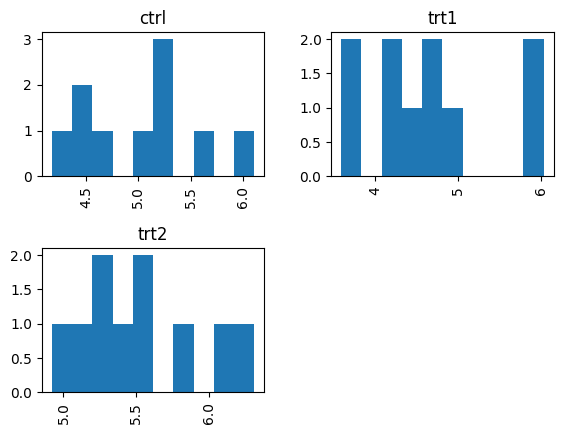

In [6]:
# visualise data by groups with histogram ref: https://www.statology.org/pandas-histogram-by-group/
df['weight'].hist(by=df['group'])
plt.show()

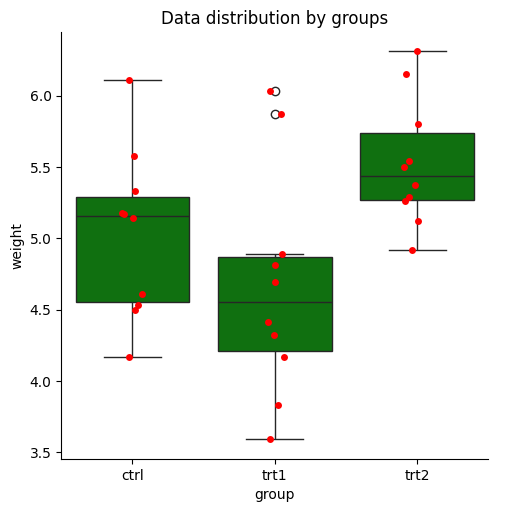

In [7]:
# visualise data by groups with boxplot and catplot ref: https://www.statology.org/pandas-histogram-by-group/
sns.catplot(data=df, x='group', y=df.columns[0], color="red")
sns.boxplot(data=df, x='group', y=df.columns[0], color="green")
plt.title("Data distribution by groups")
plt.show()

### Visualisation Analysis
The grouped histogram of the `weight` variable is inconclusive regarding data spread due to the small sample size. However, the box and scatterplots reveal a clear distinction between groups, especially between `trt1` and `trt2`, which show evident separation.

# 3. Description of t-test, how it works, and what the assumptions are.

 A t-Test is a statistical test to determine if there is a significant difference between two samples by testing whether the means of the two samples are significantly different or not. It was originally developed by William Sealy Gosset at the Guinness Brewing Company to measure the consistent quality of stout.<br>
 The test compares the means of two groups, calculates a t-statistic to assess if the null hypothesis holds ($H_0$: There is no significant difference between the means of the samples.), and uses the resulting p-value to determine statistical significance against a chosen threshold (commonly; $ \alpha = 0.05 $).[6]<br>
 Assumptions for t-test include; the measured values are in ratio scale or interval scale, simple random extraction, homogeneity of variance, appropriate sample size, and normal distribution of data.[7]<br>
 
 There are three main types of t-test:
+ An Independent Samples t-test compares the means for two separate groups.
+ A Paired sample t-test compares means from the same group at different times or different conditions.
+ A One sample t-test tests the mean of a single group against a known mean.[8]

In the case of the *PlantGrowth* dataset, an Independent Samples t-test is the most appropriate as the data is collected from different plants with different treatments applied. 

In python, scipy's `scipy.stats.ttest_ind()` function is commonly used for Independent Smaples t-test. This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.[9]<br>
SciPy is a Python library that extends NumPy, providing advanced tools for scientific computing, including optimization, integration, signal processing, and statistical analysis.[10]

## 3.1 Verifying t-Test Assumptions

The t-test assumes that the data consists of measured values on a ratio scale and follows a normal distribution. It is necessary to verify these assumptions before proceeding. From previous analysis, we know that `weight` is the only measured ratio variable in the dataset, and it has the appropriate data type. However, due to the small sample size, the histogram was inconclusive regarding its normal distribution, therefore a statistical test will be utilised to verify.

The **Shapiro-Wilk test** is a standard method to verify normal distribution. The null hypothesis of this test states that the data follows a normal distribution. If the p-value from the test result is less than the chosen significance level (commonly 0.05), the null hypothesis is rejected, suggesting that the data is not normally distributed. [11]  <br>
In python, scipy's `scipy.stats.shapiro()` is the most popular function to carry out the Shapiro-Wilk test.[12]

Since the goal is to compare the `trt1` and `trt2` groups, the Shapiro-Wilk test will be applied separately to each group.


In [8]:
# Check normal distribution with Shapiro-Wilk test
groups = df['group'].unique()  # Get group names
# Carry out shapiro test for each group
for group in groups:
    group_data = df[df['group'] == group]['weight']
    shapiro = stats.shapiro(group_data)
    print(f"Group {group}:, {shapiro}")

Group ctrl:, ShapiroResult(statistic=0.9566815495491028, pvalue=0.7474744915962219)
Group trt1:, ShapiroResult(statistic=0.9304108619689941, pvalue=0.451945960521698)
Group trt2:, ShapiroResult(statistic=0.941005289554596, pvalue=0.5642533898353577)


The null hypothesis of the Shapiro-Wilk test states that the data is normally distributed. For all three groups (`ctrl`, `trt1`, `trt2`), the p-values are well above 0.05. Therefore, we fail to reject the null hypothesis, indicating that the `weight` variable for each group can be considered normally distributed. This satisfies the normality assumption required for conducting a t-test.

## 3.2 Perform a t-Test to determine whether there is a significant difference between the two treatment groups trt1 and trt2

In [ ]:
# Perform independent sample t-test for trt1 and trt2 groups using scipy t-test
result = stats.ttest_ind(df[df['group'] == 'trt1']['weight'],df[df['group'] == 'trt2']['weight']) #for independent t-test scipy uses ttest_ind()
#output result
print(result)

#ttest_rel ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

TtestResult(statistic=-3.0100985421243616, pvalue=0.0075184261182198574, df=18.0)


### 3.2.1 Output Analysis:
- The `t-statistic` of -3.01 indicates that the mean of `trt1` is significantly lower (hence the negative value) than the mean of `trt2`.
- The `p-value` of 0.0075 is much lower than the commonly used threshold for statistical significance (0.05), thus rejecting of the null hypothesis that there is no difference between the group means.
- The `df` (degrees of freedom) of 18 indicates the total sample size used in this t-test.

>`The results of the t-test suggest that the treatments used in `trt1` and `trt2` samples, likely had statistically significant effects on plant weight, with the weight for `trt1` being significantly lower than that for `trt2`. This finding is supported by the combined boxplot and scatterplot visualisations in the *Data Visualisation* section ([2.2](##22-data-visualisation)).`


# 4. ANOVA

###### Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.<br>Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.

ANOVA (Analysis of Variance, introduced by Ronald Fisher) is a statistical technique for evaluating differences among group means in a sample. It is especially practical to compare multiple groups simultaneously, addressing the limitations of tests like t-tests.<br>

There are different types of ANOVA:
+ One-way ANOVA: for one independent variable
+ Two-way ANOVA: for two independent variables
+ N-way ANOVA: for multiple factors<br>

ANOVA works by comparing the variance within groups to the variance between groups. The output is an F-statistic, p-value and df or degree of freedom. <br> 
$$[F = \frac{\text{between-group variability}}{\text{within-group variability}}]$$
The F-statistic compares the variability between group means to the variability within groups. In a one-way ANOVA, it is calculated as the ratio of variances, from squared deviations, reflecting differences between group means. A higher F-value suggests greater differences among group means and may lead to rejecting the null hypothesis of equal means if it exceeds a critical probability (usually $(\alpha = 0.05 )$) threshold. The p-value indicates whether the F-statistic is statistically significant or likely due to random chance.[13]
<br>The result of the F-test is determined by comparing the calculated F-value to the critical F-value from an F-Table, based on a chosen significance level (usually p < 0.05) and degrees of freedom, which depend on the sample size and the number of groups being compared.[14]

## 4.1 Carry out ANOVA statistical test

In Python, the `scipy.stats` library is a popular tool for performing statistical tests such as ANOVA. When using **`scipy.stats.f_oneway()`** for one-way ANOVA, the function directly calculates both the **F-statistic** and the **p-value**, so there's no need to manually use an F Table.[15]

In [11]:
# Separate the groups (ref: lecture notes 05_anova.ipynb)
ctrl = df[df['group'] == 'ctrl']['weight']
trt1 = df[df['group'] == 'trt1']['weight']
trt2 = df[df['group'] == 'trt2']['weight']

# carry out ANOVA and print results
f,p = stats.f_oneway(ctrl,trt1,trt2)
print(f"ANOVA results \nf-statistics: {f}\np-value:{p}")

ANOVA results 
f-statistics: 4.846087862380136
p-value:0.0159099583256229


### 4.1.1 ANOVA output analysis

The F-statistic of 4.846 and the p-value of 0.0159 indicate a statistically significant difference among the means of the three groups (ctrl, trt1, and trt2) at the $ \alpha = 0.05 $ significance level. Since $ p < 0.05 $, we may reject the null hypothesis, which states that all group means are equal, and conclude that at least one group mean differs significantly.


### 4.2 Type I and Type II statistical errors

In statistical hypothesis testing, a Type I error (false positive) occurs when the null hypothesis is rejected despite being true, while a Type II error (false negative) happens when the null hypothesis is not rejected even though it is actually false.[16]<br>

#### 4.2.1 Type I error, Post-hoc test - Tukey's HSD

Tukey's Honest Significant Difference (Tukey's HSD) is a post-hoc (follow-up) test to identify which specific group means differ significantly while controlling for Type I errors. It is commonly used as a follow up to one-way ANOVA to assess the significance of differences between pairs of group means.[17] SciPy Stats uses the `tukey_hsd()` function to perform Tukey’s HSD test for equality of means over multiple treatments. Tukey’s HSD performs pairwise comparison of means for a set of samples. Whereas ANOVA (e.g. f_oneway) assesses whether the true means underlying each sample are identical, Tukey’s HSD is a test to compare the mean of each sample to the mean of each other sample. [18] Making it an excellent tool for identifying which groups are the most distant from each other.

In [12]:
#Tukey's HSD (Honestly Significant Difference)
res=stats.tukey_hsd(ctrl,trt1,trt2)
print(res)
# if any of the comparison's p value is under 0.05 it indicates significant difference for that pairwise comparison

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.371     0.391    -0.320     1.062
 (0 - 2)     -0.494     0.198    -1.185     0.197
 (1 - 0)     -0.371     0.391    -1.062     0.320
 (1 - 2)     -0.865     0.012    -1.556    -0.174
 (2 - 0)      0.494     0.198    -0.197     1.185
 (2 - 1)      0.865     0.012     0.174     1.556



##### 4.2.1.1 Tukey's HSD Results

Each row in the table represents a comparison between two group means *(0=ctrl, 1=trt1, 2=trt2)*. The columns provide the mean difference, standard error, lower and upper bounds of the confidence interval, and the p-value. The p-value indicates the likelihood that the observed mean difference occurred by chance. If the p-value is below the chosen significance level (typically 0.05), the means are considered significantly different.[19] <br>
A confidence interval is a range of values that is likely to contain a population parameter with a certain level of confidence. Therefore if a confidence interval contains zero there is strong evidence that the difference between the two population means is not significant. A Type I error would occur if a comparison showed a significant p-value (< 0.05) while the confidence interval still included zero.[20] 

>`In line with the previous t-test, the comparison between groups (1 - 2) (trt1 and trt2) shows the largest mean difference of -0.865, with a p-value of 0.012 (< 0.05). This indicates a statistically significant difference in their means. For all other comparisons, the p-values are greater than 0.05, and their confidence intervals include 0. This indicates that there are no false positives, meaning Type I errors are ruled out.`

#### 4.2.3 Type II error and power of test analysis

The rate of the type II error (β-beta) is related to the power of a test, which equals 1−β.[21]
Statistical power is a critical concept in hypothesis testing that measures the ability of a test to detect a true effect when one exists. It is defined as the probability of correctly rejecting a false null hypothesis, in other words, the likelihood of avoiding a Type II (false negative) error. 
The power of a test is influenced by several factors, including: sample size, effect size, significance level, and within-group variability.[22]

In [25]:
# review summary stats
df.groupby('group').describe() 

weight                                                    
       count   mean       std   min     25%    50%     75%   max
group                                                           
ctrl    10.0  5.032  0.583091  4.17  4.5500  5.155  5.2925  6.11
trt1    10.0  4.661  0.793676  3.59  4.2075  4.550  4.8700  6.03
trt2    10.0  5.526  0.442573  4.92  5.2675  5.435  5.7350  6.31

The likelihood of correctly rejecting the null hypothesis (at least one group mean differs) increases with:
+ Larger Sample Sizes: With only 10 observations per group, the sample size is relatively small, which may limit the test's power to detect differences.
+ Distinct Group Means: The group means are 5.032 (ctrl), 4.661 (trt1), and 5.526 (trt2). The difference between trt1 and trt2 is notable, while the other differences are not significant.
+ Low Within-Group Variability: Standard deviations are 0.583 (ctrl), 0.794 (trt1), and 0.443 (trt2), indicating moderate variability within groups.
[22]

Given these factors, especially the sample size, the current data may not allow for high statistical power, increasing the risk of Type II errors (failing to detect true differences).

A more suitable approach for assessing Type II errors is Statistical Power Analysis. This analysis involves four interrelated variables: Effect Size, Significance Level (α), Power (1−β), and Sample Size. Adjusting one variable impacts the others. In practice, power analysis calculates the unknown variable when the other three are specified. <br>In Python, the `statsmodels` package offers the `stats.power` module, which provides functions for conducting power analysis for the most commonly used statistical tests. [23]


In [ ]:
# Code adapted from : https://www.geeksforgeeks.org/introduction-to-power-analysis-in-python/

# Power analysis - Calculate effect size

from math import sqrt
from statsmodels.stats.power import TTestIndPower

# mean, standard deviation and sample size from summary statistics.
ctrl_mean, ctrl_std, ctrl_n = 5.032, 0.583091, 10
trt1_mean, trt1_std, trt1_n = 4.661, 0.793676, 10

# calculated variance of samples
s1, s2 = ctrl_std**2, trt1_std**2

# calculated the pooled standard deviation
n1, n2 = ctrl_n, trt1_n
pooled_std = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))

# calculate the effect size
effect_size = (ctrl_mean - trt1_mean) / pooled_std
print(f"Effect size (Cohen's d): {effect_size}")

# perform power analysis to find required sample size
alpha = 0.05  # Significance level (5% risk of rejecting the null hypothesis when it's actually true)
power = 0.8   # Desired power (80% chance of correctly rejecting a false null hypothesis.)

# Initialize power analysis object
obj = TTestIndPower()

# Calculate the required sample size for each group
n = obj.solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1, alternative='two-sided')
print('Sample size/Number needed in each group: {:.3f}'.format(n))


Effect size (Cohen's d): 0.5327478273956501
Sample size/Number needed in each group: 56.285


To detect a significant effect with an effect size (Cohen's d) of 0.533, approximately 57 samples per group are recommended. Conducting a t-test with smaller samples may yield non-significant p-values despite a substantial effect, primarily due to insufficient sample size.

# 5. Project conclusion

This project analyzed the "PlantGrowth" dataset to demonstrate statistical testing in the evaluation process of the effects of two treatments on plant weight compared to a control group. Data cleaning ensured accuracy and consistency. Visualizations with histograms and box plots, provided insights into weight distributions across sample groups with the boxplots indicating notable difference between `trt1` and `trt1`. Pairwise t-tests compared the two groups, revealing that the treatments associated with `trt1` and `trt2` likely had different effects on plant weight, with `trt1` sample weights being significantly lower than `trt2`. A one-way ANOVA revealed that the differences among group means is statistically significant. A subsequent Tukey's HSD test identified groupwise differences, controlling for Type I errors. This test also found that the only statistically significant difference is between `trt1` and `trt2` further supporting the findings of the t-test and the visualisations. The analysis controlled for Type I errors through Tukey's HSD test. However, the power analysis revealed that with only 10 samples per group, the study is exposed to a higher risk of Type II errors. Power analysis indicated that approximately 57 samples per group are needed to achieve adequate power. Therefore, increasing the sample size is recommended to enhance the reliability of the findings.

# References

- [1]: Github.io. (2024). R: Results from an Experiment on Plant Growth. [online] Available at: https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html.
- [2] Dobson, A.J., 2013. Introduction to statistical modelling. Springer. 
- [3] McKinney, W. & others, 2010. Data structures for statistical computing in python. In Proceedings of the 9th Python in Science Conference. pp. 51–56.
- [4] Hunter, J.D., 2007. Matplotlib: A 2D graphics environment. Computing in science &amp; engineering, 9(3), pp.90–95.
- [5]: Waskom, M. et al., 2017. mwaskom/seaborn: v0.8.1 (September 2017), Zenodo. Available at: https://doi.org/10.5281/zenodo.883859.
- [6]: Maverick, J.B. (2021). What assumptions are made when conducting a t-test? [online] Investopedia. Available at: https://www.investopedia.com/ask/answers/073115/what-assumptions-are-made-when-conducting-ttest.asp.
- [7]: Kim, T.K. and Park, J.H. (2019). More about the basic assumptions of t-test: normality and sample size. Korean Journal of Anesthesiology, [online] 72(4), pp.331–335. doi:https://doi.org/10.4097/kja.d.18.00292.
- [8]: Glen, S. (2022). Independent Samples T Test: Definition, Excel & SPSS Steps. [online] Statistics How To. Available at: https://www.statisticshowto.com/probability-and-statistics/t-distribution/independent-samples-t-test/.
- [9]: Scipy.org. (2011). scipy.stats.ttest_ind — SciPy v1.4.1 Reference Guide. [online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html.*
- [10]: Virtanen, P. et al., 2020. SciPy 1.0: Fundamental Algorithms for Scientific Computing in Python. Nature Methods, 17, pp.261–272.
- [11]: Wikipedia Contributors (2019). Shapiro–Wilk test. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test.
- [12]: Scipy.org. (2011). scipy.stats.shapiro — SciPy v1.3.0 Reference Guide. [online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html.
- [13]Wikipedia Contributors (2019). Analysis of variance. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Analysis_of_variance.
- [14]: Wikipedia Contributors (2019). F-test. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/F-test.
- [15]: Scipy.org. (2014). scipy.stats.f_oneway — SciPy v1.3.1 Reference Guide. [online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html.
- [16]: Wikipedia (2021). Type I and type II errors. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Type_I_and_type_II_errors.
- [17]: BioStats. (n.d.). Post Hoc Tests – Tukey HSD – bioST@TS. [online] Available at: https://biostats.w.uib.no/post-hoc-tests-tukey-hsd/.
- [18]: docs.scipy.org. (n.d.). scipy.stats.tukey_hsd — SciPy v1.11.1 Manual. [online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html.
- [19]: FasterCapital. (n.d.). Tukey s HSD: Post Hoc Analysis after ANOVA. [online] Available at: https://fastercapital.com/content/Tukey-s-HSD--Post-Hoc-Analysis-after-ANOVA.html.
- [20]: Zach (2021). How to Interpret a Confidence Interval that Contains Zero. [online] Statology. Available at: https://www.statology.org/confidence-interval-contains-zero/.
- [21]:Wikipedia (2021). Type I and type II errors. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Type_I_and_type_II_errors.
- [22]: AI (2014). The Science of Machine Learning & AI. [online] The Science of Machine Learning & AI. Available at: https://www.ml-science.com/statistical-power-of-a-test<br>
- [23]: GeeksforGeeks (2021). Introduction to Power Analysis in Python. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/introduction-to-power-analysis-in-python/ [Accessed 10 Dec. 2024].
